In [1]:
from os import getcwd, path
from pathlib import Path
from sys import path as sp
sp.append(path.join((Path.cwd()),"scripts"))

from filepaths import paths

In [2]:
from extractfile import getCipherFiles, readFiles, setup, touchFile
cipherFiles = getCipherFiles()
len(cipherFiles)

22

In [3]:
from combine import cipherToPlainWithKey, plainToCipher
import matplotlib.pyplot as plt
import numpy as np
import math

# SETUP

In [4]:
# Ours: 6
ctl, filenames = readFiles(cipherFiles)


In [5]:
rf, alphadict, alphalist, keyshift, chkarr = setup()
keylen = 16

In [6]:
from visualisers import plot_full_v2, plot_guess, plot_guess2
from decryptors import findKeyLen, crackWithKnownLen, generateArrayCheck, knownKeyLenArr, brute

In [7]:
i = 0
CtPairList = []
longkey = False
for TargetedText in ctl:
    #Generate np arrays for plotting Demo
    genArr = generateArrayCheck(TargetedText, chkarr)
    
    longkey = i < 6
    kgs, idx = brute(TargetedText, longkey=longkey)

    CtPairList.append((TargetedText,kgs[idx]))
    print(ctl.index(TargetedText), filenames[ctl.index(TargetedText)])
    print(cipherToPlainWithKey(TargetedText, kgs[idx], verbose=False))

    i+=1


0 6
enrällnaefhäeneestsrassravlqaattaeeentteatrteeermaleeeeaanmseaeeataendhdrhndnltaeahereserentttnsltedenertaaaaheerteeeelseehenhttntenrerattehesrestnarahalraeadrnatenethrreeesaeatarrsateteednaetseareaaeeedeeenhatneeeedeaereerlaeesesereasteteleseeennnreeeeldnrraeäaarnnlebnaaeelenäaenetarehtatnanraaadalaereenhaeeeearerrseeaseeeeeseseasleemarndalsrareneededsterrrsselhtemlrtealteateeeeemeeratreremnenaesreteseermretsrraenaeealrhnsasnetaatnrnhdeeehraetttereeaenreterrtreerelstemeeereeneaetataamerednnaeetstheamoaeasiärwieeqeötasabxntereee
1 4
eenenrenntsnaecesnesemdhternetaereaeeenrtstnddaanrrtaaeattemtndeettrsraemeeseeeeraneesnreelerrnteeaeaelenelsmtarntttlheeatmaerareaernaneterrellesennrathardenalrtmnarenmeaenneettseetaaeaeaeeelnnnreeeeeeaatatneteereatehssnreetahtneratrnthamjlerleroteasenreeeatathreaererrdeannaseetrsaereeasaareesehlrneattaerlnnaeletsheneanaeatasnamsmsaeltdeaeesetreneeattrereeramrdeeeereeatleeeadtettreraedsreteeettmseteretahaanltatrdsttndmeeeeenhdrllserseseaentmsaaeaatanres

In [8]:
def saveOutputLen(ciphers, keylen, newName):
    OUTDIR = paths.get('OUTPUT_DIR')
    p = Path(OUTDIR,newName)
    p.mkdir(exist_ok=True)
    Kguess,__ = crackWithKnownLen(ciphers, keylength=keylen)
    Pguess = cipherToPlainWithKey(ciphers, Kguess)
    plainPath = Path(p,("".join([newName,".plain"])))
    keyPath = Path(p,("".join([newName,".key"])))
    touchFile(plainPath, Pguess)
    touchFile(keyPath, Kguess)

def saveOutputKey(ciphers, key, newName):
    OUTDIR = paths.get('OUTPUT_DIR')
    p = Path(OUTDIR,newName)
    p.mkdir(exist_ok=True)
    Pguess = cipherToPlainWithKey(ciphers, key)
    plainPath = Path(p,("".join([newName,".plain"])))
    keyPath = Path(p,("".join([newName,".key"])))
    touchFile(plainPath, Pguess)
    touchFile(keyPath, key)
    print()

In [9]:
# Weird: 
ctIdx = -7
tmpAns = brute(ctl[ctIdx],longkey=True)
print(cipherToPlainWithKey(ctl[ctIdx], tmpAns[0][tmpAns[1]]))

Decrypted using Key: äsuådååöpöekzseyåäwguöjdjrlajuybkzeädcqwseoaffrzarkmbgrcjzxcpseöpöipåvvgcthnimåfzöwczöxyztxcefaläeasdysrpfkåpcevhzjtoåxnånfarhtxirwnehlötgmåitfpiöbgmaköiåjnmraåfzwääsmyrqzhcoxjjnpbåshxadäyhmdtlöbetwånoc
hgunneleatsrheaeethnteeatheeaeraeeernnlrnereeeratetaasetaeneeeeheeaattenteeeatereahterlamrhdteerlslnreetestaraanetenesensanetrnllneherattlretnatrareetlmandttareeersamnleaehaettaeeheettedeldstttaselaaateertetmeaeantedrnaeetealtrenarttrmeaeeteatramdeerraarradneeetedrerntrnrhsrmhlsnreaeertaereaeeetetenesenmneaeearredrnehahenssteeseeseemataneedetrneseelreetsernethhraatesenteerhnneeeelmarreleenneasameeeenrserä
hgunneleatsrheaeethnteeatheeaeraeeernnlrnereeeratetaasetaeneeeeheeaattenteeeatereahterlamrhdteerlslnreetestaraanetenesensanetrnllneherattlretnatrareetlmandttareeersamnleaehaettaeeheettedeldstttaselaaateertetmeaeantedrnaeetealtrenarttrmeaeeteatramdeerraarradneeetedrerntrnrhsrmhlsnreaeertaereaeeetetenesenmneaeearredrnehahenssteeseeseemataneedetrneseelreetsernethhraat

In [10]:
for i in range(len(CtPairList)):
    saveOutputKey(CtPairList[i][0], CtPairList[i][1], filenames[i])

Decrypted using Key: gädqiswkxfeähäwtayzåxatebdreyödtsömykåsljjerådkonttkeqdåmngmeöiväuebgersrhöaffzeäaöhfyzdjdvuuiuwxcpvtaåkäxsmsxhhjzsgfxjåyåorlcvnräaymtnhrgopäjhzeömäeyeirköbärährpmcalhaöubwuobfrtansräitkhuxpcgväsrhwudrmteppyångspväwuizzbdtbåctspprrnnöqpzyozöövvränxszbsynrögohnitaonqzwqyfhnäwfaölkbösnrwcäuquöuåtqäzöråfhmkntöbqeäxrdvfqfiålfoteeebkägwfezpriucvkåsbglrqqowsfmåzlgbhuoklkånsjcicmlnrögäimipödzåpuämgexfpnrpuobåkåqjpsamfniwjveqläozpdåxlxczahvvnngvotfedäitwåidriunöpbxbeyövägvpolrltrtttskpörpjsäzejäsäxbrrstöuöbodqotspphämibetsrflxhkryuuspk
eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee

In [11]:
for targetText in ctl:
    genArr = generateArrayCheck(targetText,chkarr)

    possibleKeylen = findKeyLen(genArr, False)
    crackedKey, __ = crackWithKnownLen(targetText, keylength=possibleKeylen)
    print(targetText)
    pt = cipherToPlainWithKey(targetText, crackedKey)
    print()

KeyLenMostLikely 9
mfjhaaaaa
kchumwåoäjiclcåxeöabäexifhviödhxwdqöobwpnnivbhosrxxoiuhbqrkqidmzcyifkivwvldejjaicedljöahnhzyymyåägtzxebocäwqwällnawkjänböbsvpgzrvceöqxrlvkstcnlaidqciöimvodfcvclvtqgepledyfåysfjvxerwvcmxolyätgkzcwvlåyhvqxittöbrkwtzcåymaafhxfbgxwttvvrrdutaösaddzzvcräwafwörvdkslrmxesruaåuöjlrcåjedpofdwrvågcyuydybxucadvbjlqorxdfuicävhzjujmbpjsxiiifockåjiatvmygzobwfkpvuusåwjqbapkflysopobrwngmgqprvdkcmqmtdhabtycqkiäjtrvtysfbobuntweqjrmånziupcsathbäpägaelzzrrkzsxjihcmxåbmhvmyrdtfäfiödzckztspvpxvxxxwotdvtnwcaincwcäfvvwxdydfshusxwttlcqmfixwvjpälovöyywtoz
Decrypted using Key: mfjhaaaaa
äåänmwåoäådwecåxeörzsåxifhvzxxaxwdqöczninnivbyjjkxxoiuyzhkkqidmnåpbfkivwjgxåjjaicväccöahnhntpfyåägtnsyxocäwqkwcenawkjpivvbsvpgnmmyeöqxröqbltcnlazähyiöimvcäzyvclvtebyiledyfotjäjvxerkqwfxolyähbbscwvlåmcmjxittösmbptzcåyayuähxfbglrkmvvrrdiouvsaddznqwkäwafwqmmzkslrmlöjkuaåuöågiyåjedpcaxprvågcmppzybxucrämxjlqorläznicävhnelcmbpjsldöbfockåådumvmygzcznäkpvuugvncqbapkwgplopobrkiåfgqprvufwfqmtdhrzkrcqkiäåoiotysfb

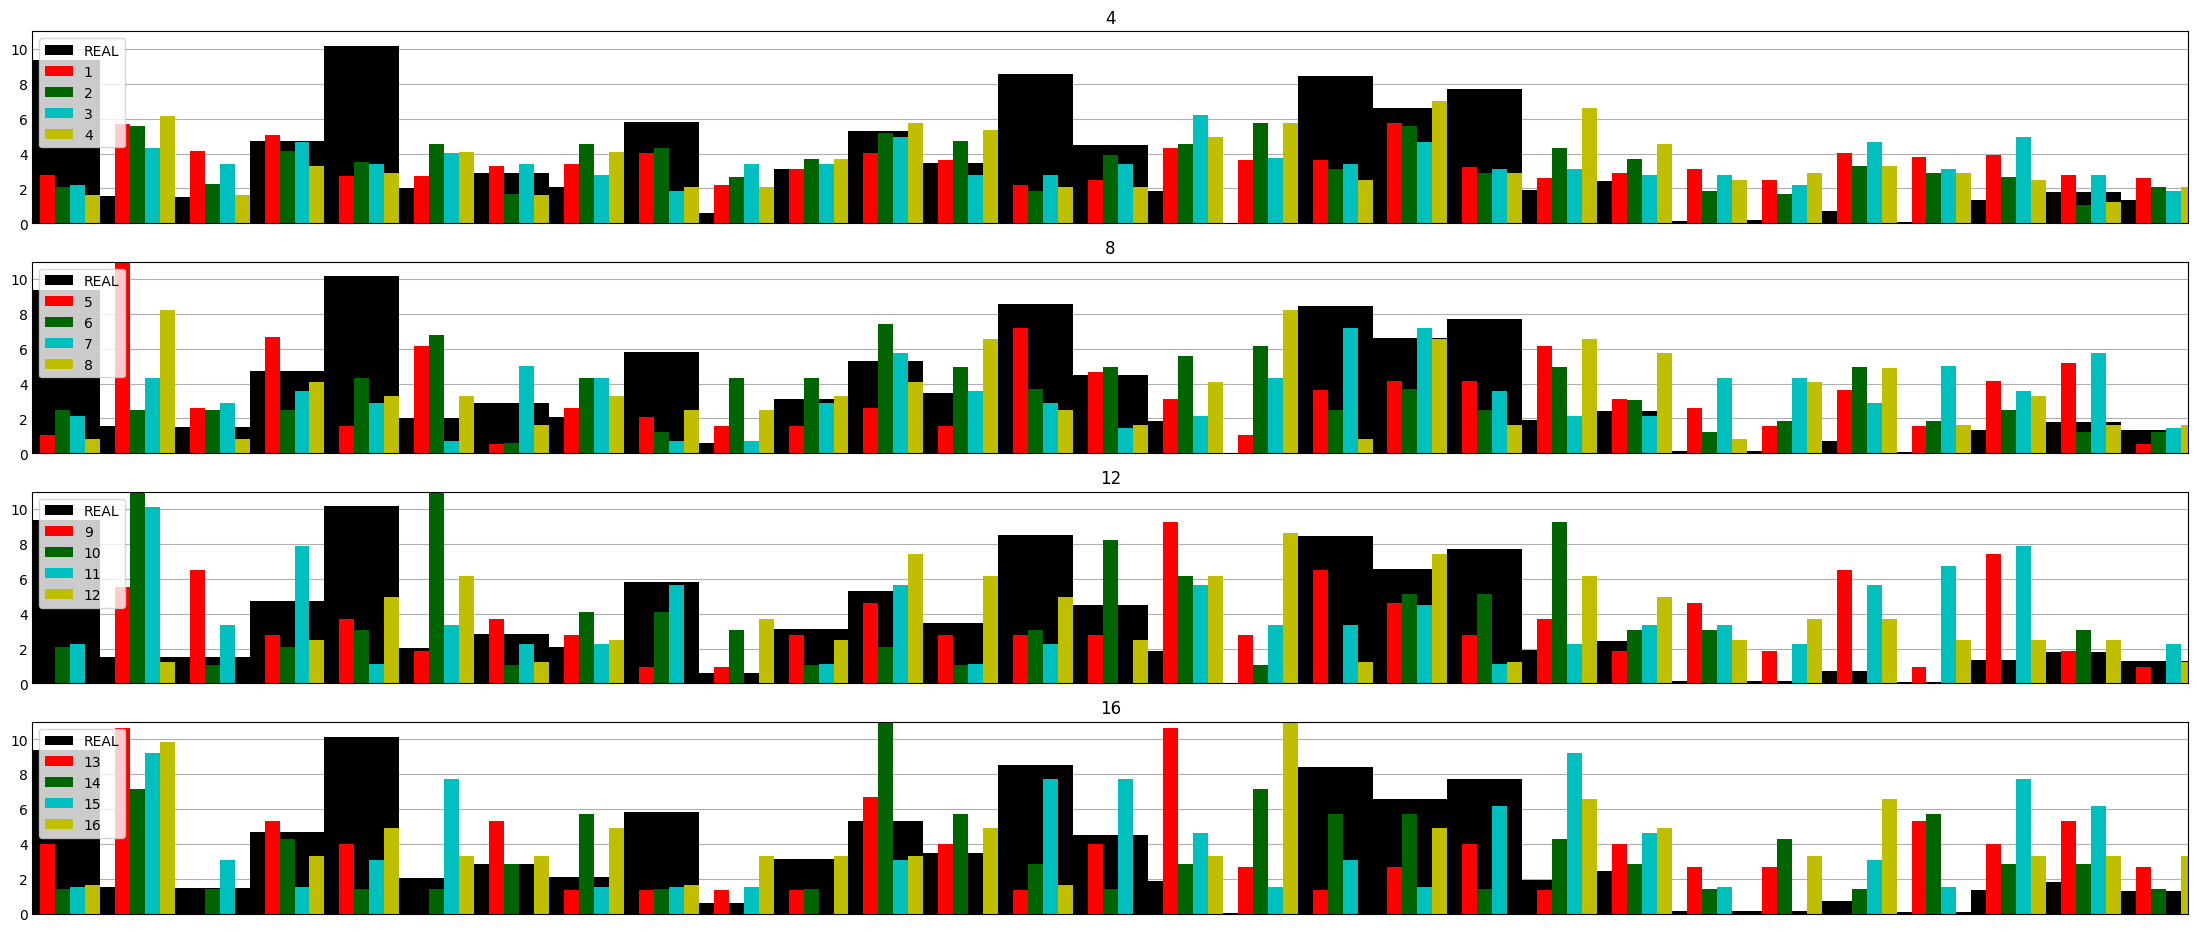

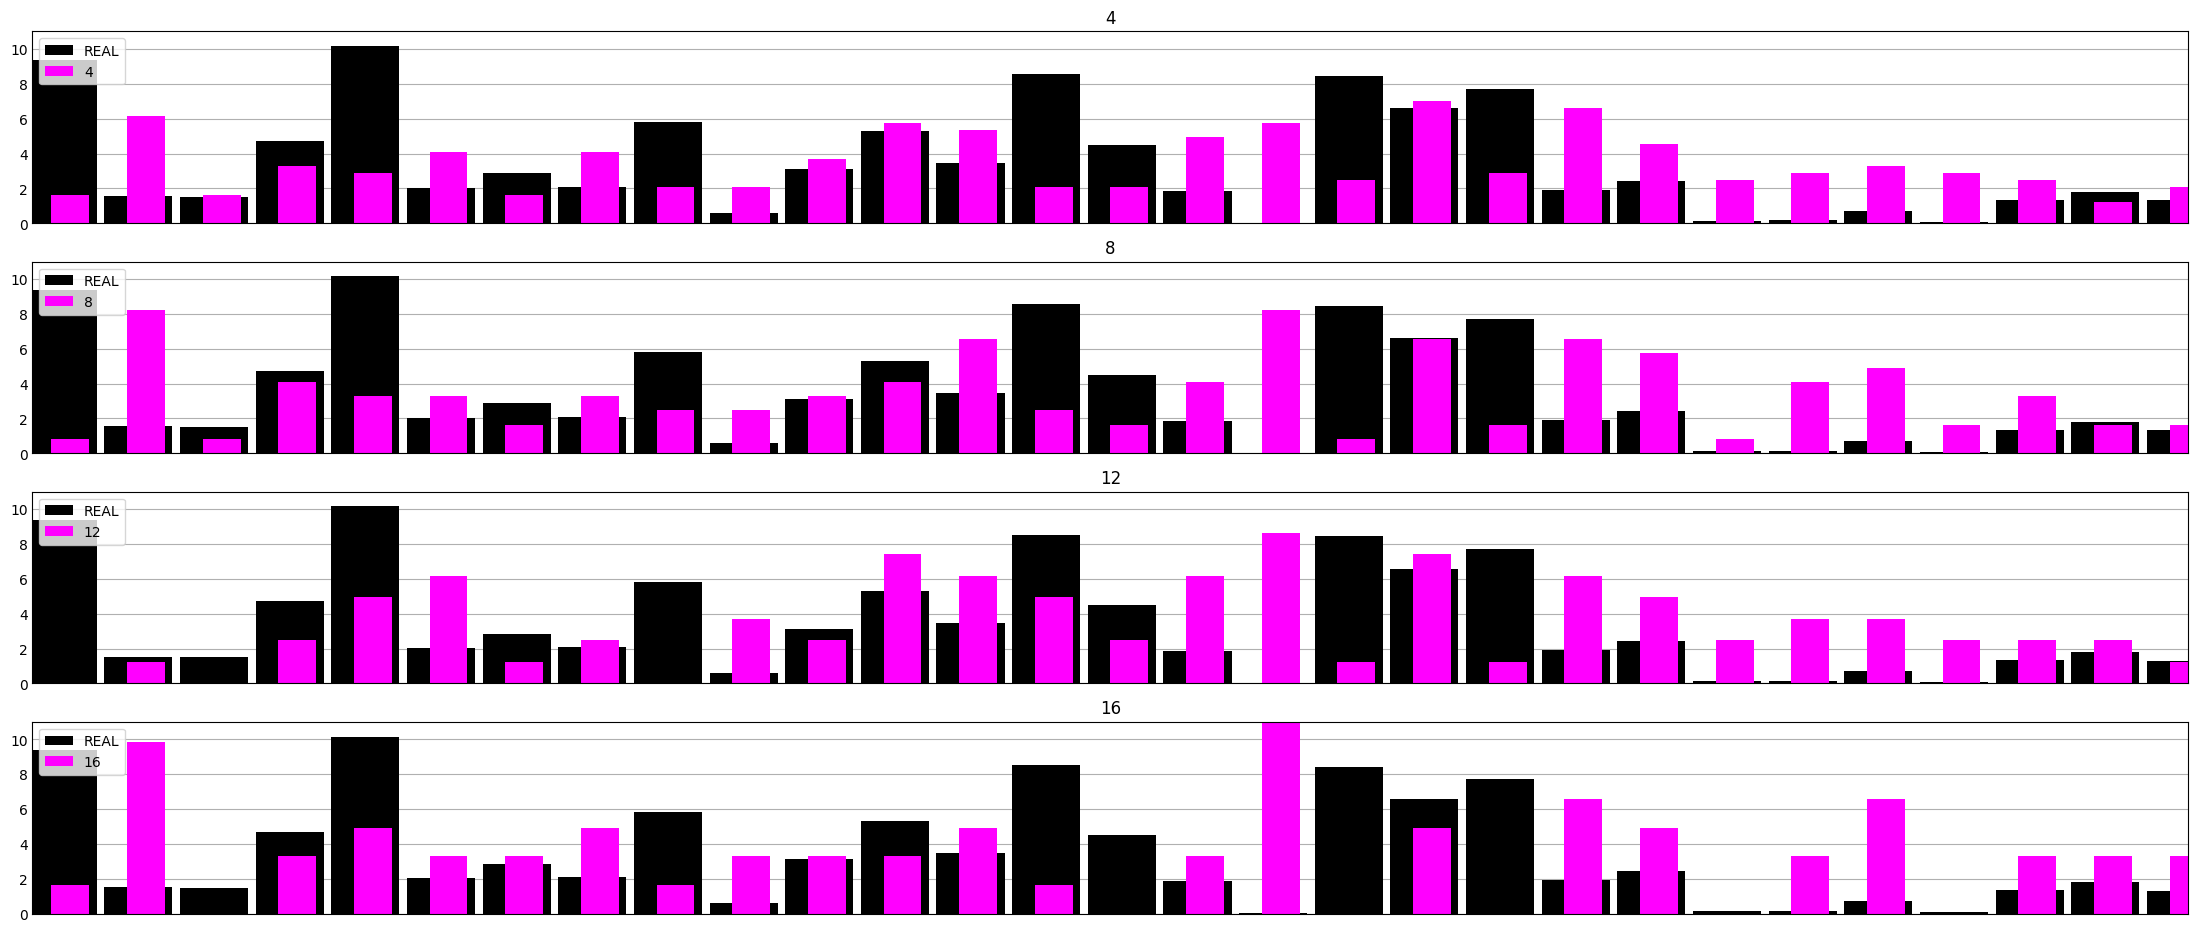

In [14]:
plot_full_v2(genArr)
plot_full_v2(genArr, isolate=3)


In [18]:
knownArr = knownKeyLenArr(TargetedText, keylen=10)

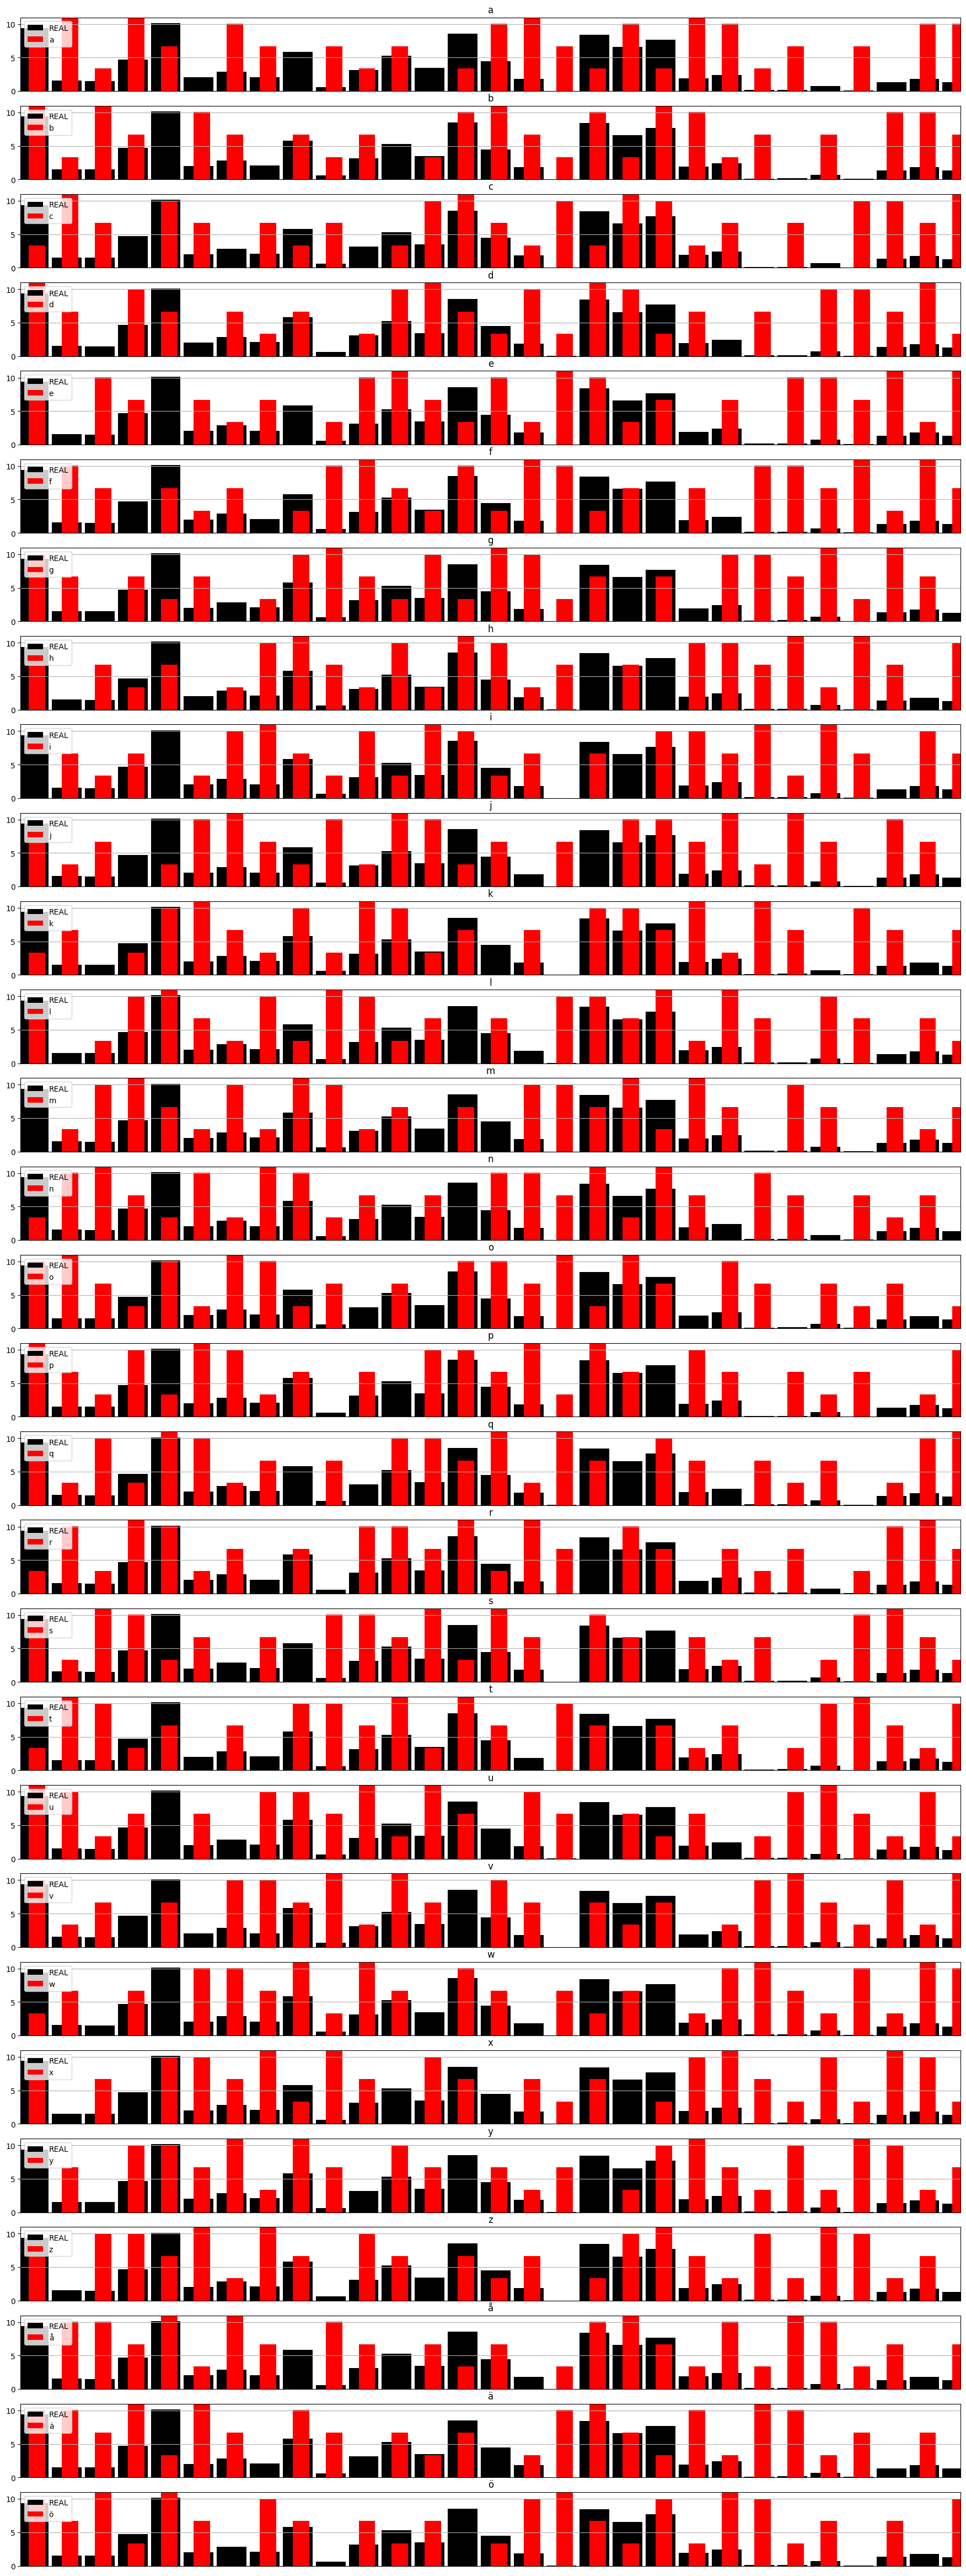

In [19]:
tester = plot_guess2(knownArr, 2)

In [ ]:
for txt in ctl:
    print(ctl.index(txt),len(txt))
    print(txt)